In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [42]:
all_data = pd.read_csv('homeless_prep.csv')
all_data

,CLIENT_KEY,AGE,GENDER,VETERAN,INCOME,NIGHTS,substanceabuse,completed,probation,assistancetype,required
0,256172,20,Female,No,0.00,152.0,0,0,1,tempassistance,1
1,221079,20,Female,No,740.00,229.0,0,1,0,tempassistance,1
2,243074,21,Female,No,0.00,105.0,1,1,0,tempassistance,1
3,129974,21,Female,No,0.00,371.0,1,1,0,tempassistance,1
4,226596,22,Female,No,0.00,169.0,0,0,0,tempassistance,1
...,...,...,...,...,...,...,...,...,...,...,...
237,204806,77,Male,Yes,0.00,12.0,0,1,0,permassistance,0
238,320878,77,Female,Yes,1331.02,25.0,0,1,0,permassistance,0
239,213114,79,Male,Yes,2100.00,11.0,0,1,0,permassistance,0
240,258969,79,Female,Yes,694.00,16.0,0,1,0,permassistance,0


In [43]:
data=all_data[['AGE', 'NIGHTS']]
data.sort_values('AGE', ascending=False)
age_less_25=data.loc[data['AGE'] < 25]
age_from_25_to_35 = data.loc[(data['AGE'] >= 25) & (data['AGE'] <= 35)]
age_from_35_to_50 = data.loc[(data['AGE'] >= 35) & (data['AGE'] <= 50)]
age_from_50_to_60 = data.loc[(data['AGE'] >= 50) & (data['AGE'] <= 60)]
age_from_60_to_80 = data.loc[(data['AGE'] >= 60) & (data['AGE'] <= 80)]

data = pd.DataFrame ( 
    [age_less_25.sum(), age_from_25_to_35.sum(), age_from_35_to_50.sum(), age_from_50_to_60.sum(),age_from_60_to_80.sum()],
    columns = ['NIGHTS'],
    index = ['less 25', '25-35', '35-50', '50-60','60-80']
)

n = data.shape[0]

sumn = data['NIGHTS'].sum()

data['Expected'] = (sumn/n) *n



data

,NIGHTS,Expected
less 25,6742.0,26070.0
25-35,11096.0,26070.0
35-50,6804.0,26070.0
50-60,918.0,26070.0
60-80,510.0,26070.0


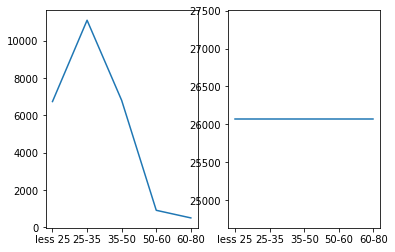

In [44]:
graph = plt.subplots(1,2)

plt.subplot(1, 2, 1)
plt.plot(data.index, data['NIGHTS'])

plt.subplot(1, 2, 2)
plt.plot(data.index, data['Expected'])

In [45]:
def pearson(significant_level, real, expected):
    if not abs(sum(real) - sum(expected)) < 0.000001:
        expected = expected / sum(expected) * sum(real)
        
    pirson_values = pd.read_excel('pirson_values.xlsx')
    pirson_values = pirson_values.loc[1:, :]
    pirson_values = pirson_values.rename(columns={"Unnamed: 0": "Level", "Рівень значимості": 0.01, "Unnamed: 2": 0.05})
    pirson_values.set_index("Level", inplace=True)
    
    chi_squared = sum([ (x_real - x_expected)**2 / x_expected for
                  x_real, x_expected in zip(real, expected)])
    
    r = len(real) - 1
    
    
    check_value = pirson_values.loc[r, significant_level]
    return check_value < chi_squared

pirson_values = pd.read_excel('pirson_values.xlsx')

In [46]:
data.insert(1, 'NIGHTS%',
                     (np.array([x for x in data['NIGHTS']]) / data['NIGHTS'].sum() * 100)
                  )
data.insert(3, 'Expected%',
                    (np.array([x for x in data['Expected']]) / data['Expected'].sum() * 100)
                  )
data

,NIGHTS,NIGHTS%,Expected,Expected%
less 25,6742.0,25.861143,26070.0,20.0
25-35,11096.0,42.562332,26070.0,20.0
35-50,6804.0,26.098964,26070.0,20.0
50-60,918.0,3.521289,26070.0,20.0
60-80,510.0,1.956272,26070.0,20.0


In [51]:

sign_1 = pirson(0.01, data['NIGHTS'], data['Expected'] )
sign_5 = pirson (0.05, data['NIGHTS'], data['Expected'] )

result = pd.DataFrame ( 
    [sign_1, sign_5],
    columns = ["Statistical discrepancy"],
    index = ['0.01', '0.05']
)

result.index.name = 'Significance'

result

,Statistical discrepancy
Significance,
0.01,True
0.05,True
